# 📊 Capstone Project - Marketing Campaign Analytics with IBM Granite (WatsonX)

Notebook ini dibuat untuk menganalisis data marketing campaign. Analisis dilakukan dengan Python untuk EDA dan IBM WatsonX Granite model untuk AI tasks (sentiment analysis & classification).

## 1. Setup Environment

In [14]:
!pip install pandas matplotlib seaborn scikit-learn ibm_watsonx_ai

## 2. Load Dataset

In [15]:
import pandas as pd
df = pd.read_csv('/content/marketing_dataset_upload.csv')  # upload file dari lokal ke Colab sebelum run
df.head()

,Customer_ID,Age,Gender,Channel,Budget_Spent,Clicks,Conversions,Email_Open_Rate,Customer_Review
0,CUST_0001,20,Female,Facebook Ads,761,499,0,0.94,"Tidak puas, barang rusak saat diterima."
1,CUST_0002,46,Male,Instagram Ads,286,32,0,0.25,"Tidak puas, barang rusak saat diterima."
2,CUST_0003,52,Male,Facebook Ads,586,109,1,0.67,Harga cukup mahal dibanding kompetitor.
3,CUST_0004,56,Male,Instagram Ads,926,218,1,0.88,Harga sepadan dengan kualitas yang didapat.
4,CUST_0005,35,Male,Google Ads,157,409,0,0.07,"Sangat direkomendasikan, pengiriman cepat."


In [16]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Channel', 'Budget_Spent', 'Clicks',
       'Conversions', 'Email_Open_Rate', 'Customer_Review'],
      dtype='object')


## 3. Exploratory Data Analysis (EDA)

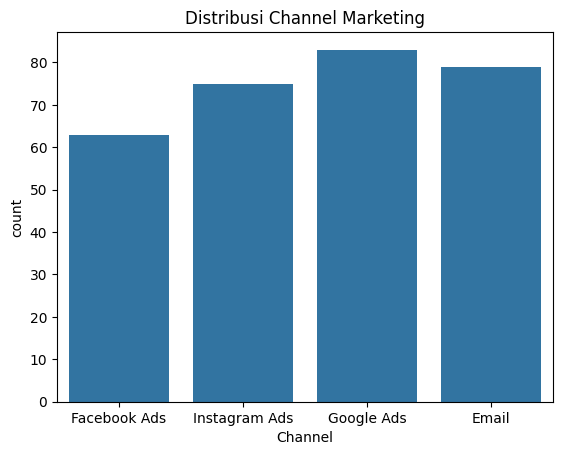

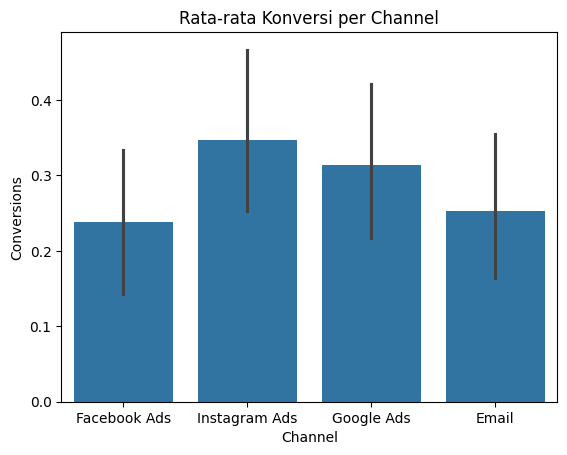

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi channel marketing
sns.countplot(x='Channel', data=df)
plt.title('Distribusi Channel Marketing')
plt.show()

# Konversi per channel
sns.barplot(x='Channel', y='Conversions', data=df)
plt.title('Rata-rata Konversi per Channel')
plt.show()

## 4. AI with WatsonX (IBM Granite)

In [18]:
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import Model

creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="b42P8axvWZ_QjUwzX8fgC9onNgsR-taVmPhEJuihyqCr"
)

model = Model(
    model_id="ibm/granite-3-2b-instruct",
    credentials=creds,
    project_id="4f5bf185-0c63-4114-b6fd-69c10477ff9b",
    params={"decoding_method": "greedy", "max_new_tokens": 100}
)

/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/model.py:106: DeprecationWarning: The `Model` class is deprecated and will be removed in a future release. Please use the `ModelInference` class instead. To update your imports, use: `from ibm_watsonx_ai.foundation_models import ModelInference`.
  warn(model_class_deprecated_warning, category=DeprecationWarning)
/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/utils/utils.py:435: LifecycleWarning: Model 'ibm/granite-3-2b-instruct' is in deprecated state from 2025-08-13 until 2025-11-12. IDs of alternative models: ibm/granite-3-3-8b-instruct. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warn(model_state_warning, category=LifecycleWarning)


### 4.1 Sentiment Analysis dengan Granite

In [19]:
sample_review = df['Customer_Review'].iloc[0]
prompt = f'Classify the sentiment of this review as Positive, Neutral, or Negative: {sample_review}'
result = model.generate(prompt=prompt)
print("Review:", sample_review)
print("Sentiment:", result)

Review: Tidak puas, barang rusak saat diterima.
Sentiment: {'model_id': 'ibm/granite-3-2b-instruct', 'model_version': '1.1.0', 'created_at': '2025-09-30T01:58:25.288Z', 'results': [{'generated_text': "\n\nThe sentiment of this review is Negative. The user expresses dissatisfaction with the product's condition upon receipt, indicating a negative sentiment.", 'generated_token_count': 31, 'input_token_count': 33, 'stop_reason': 'eos_token'}], 'system': {'warnings': [{'message': "Model 'ibm/granite-3-2b-instruct' is in deprecated state from 2025-08-13. It will be in withdrawn state from 2025-11-12. IDs of alternative models: ibm/granite-3-3-8b-instruct.", 'id': 'deprecation_warning', 'more_info': 'https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp'}, {'message': 'In future implementation, the parameter `parameters.decoding_method` will be ignored and set automatically', 'id': 'param_deprecation'}, {'message': "This API is legacy

### 4.2 Conversion Prediction (Classification)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['Age', 'Budget_Spent', 'Clicks', 'Email_Open_Rate']]
y = df['Conversions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.30      0.20      0.24        15

    accuracy                           0.68        60
   macro avg       0.53      0.52      0.52        60
weighted avg       0.65      0.68      0.66        60



## 5. Conclusion & Next Steps
- IBM Granite (WatsonX) berhasil dipakai untuk sentiment analysis.
- Model Random Forest dapat memprediksi konversi pelanggan.
- Insight dapat dipakai untuk optimasi strategi marketing.

In [21]:
from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai import Credentials

creds = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="b42P8axvWZ_QjUwzX8fgC9onNgsR-taVmPhEJuihyqCr"
)

model = Model(
    model_id="ibm/granite-3-3-8b-instruct",
    credentials=creds,
    project_id="4f5bf185-0c63-4114-b6fd-69c10477ff9b",
    params={"decoding_method": "greedy"}
)

customer_feedback = """
Saya suka promonya, tapi proses checkout agak rumit.
Email campaign cukup menarik, tapi link sering error.
"""
prompt = f"Ringkas opini pelanggan berikut secara singkat dan jelas:\n\n{customer_feedback}"

summary = model.generate_text(prompt=prompt)
print("Summary:", summary)

/usr/local/lib/python3.12/dist-packages/ibm_watsonx_ai/foundation_models/model.py:106: DeprecationWarning: The `Model` class is deprecated and will be removed in a future release. Please use the `ModelInference` class instead. To update your imports, use: `from ibm_watsonx_ai.foundation_models import ModelInference`.
  warn(model_class_deprecated_warning, category=DeprecationWarning)


Summary: 
**Jawaban:**

Berdasarkan opini pelanggan, ada be


In [22]:
prompt = f"Tentukan sentimen dari opini berikut (positif, negatif, atau netral):\n\n{customer_feedback}"

sentiment = model.generate_text(prompt=prompt)
print("Sentiment:", sentiment)

Sentiment: 
Jawaban:

1. Positif
2. Negatif
3


### 6. AI Support Explanation

In [23]:
def get_sentiment(review_text):
    if not isinstance(review_text, str) or review_text.strip() == "":
        return "Unknown"
    prompt = f"Classify the sentiment of this review as Positive, Neutral, or Negative:\n\n{review_text}"
    try:
        response = model.generate(prompt=prompt)
        return response['results'][0]['generated_text'].strip()
    except Exception as e:
        return f"Error: {str(e)}"

def get_summary(review_text):
    if not isinstance(review_text, str) or review_text.strip() == "":
        return "No summary"
    prompt = f"Summarize this customer feedback in 1-2 sentences:\n\n{review_text}"
    try:
        response = model.generate(prompt=prompt)
        return response['results'][0]['generated_text'].strip()
    except Exception as e:
        return f"Error: {str(e)}"


In [24]:
# Tambahkan kolom Sentiment & Summary dari feedback
df['Sentiment'] = df['Customer_Review'].apply(get_sentiment)
df['Summary']   = df['Customer_Review'].apply(get_summary)

# Lihat contoh hasil
print(df[['Customer_Review', 'Sentiment', 'Summary']].head())


                               Customer_Review  \
0      Tidak puas, barang rusak saat diterima.   
1      Tidak puas, barang rusak saat diterima.   
2      Harga cukup mahal dibanding kompetitor.   
3  Harga sepadan dengan kualitas yang didapat.   
4   Sangat direkomendasikan, pengiriman cepat.   

                                           Sentiment  \
0  [Answer] The sentiment of this review is Negat...   
1  [Answer] The sentiment of this review is Negat...   
2  Namun, layanan dan kualitas makanan tetap menj...   
3  Answer:\nThe sentiment of this review is Neutr...   
4  Answer: Positive\n\nExplanation: The review is...   

                                             Summary  
0  Saya menghubungi cs, mereka menawarkan solusi ...  
1  Saya menghubungi cs, mereka menawarkan solusi ...  
2  Tapi kualitas bahan dan pelayanan yang baik me...  
3  The price is in line with the quality received...  
4  Saya sangat puas dengan pelayanan dan kualitas...  


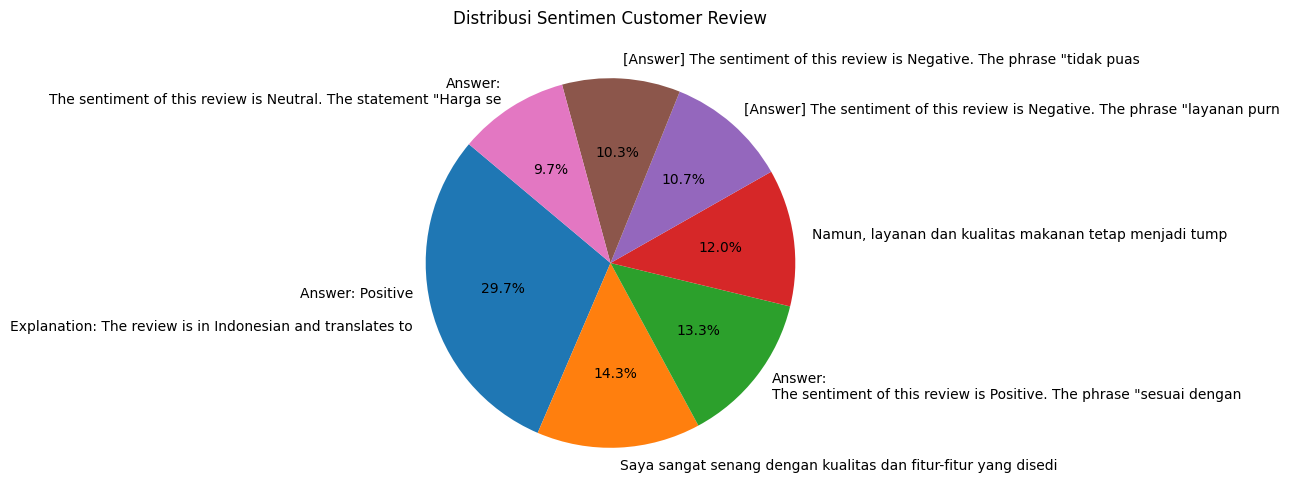

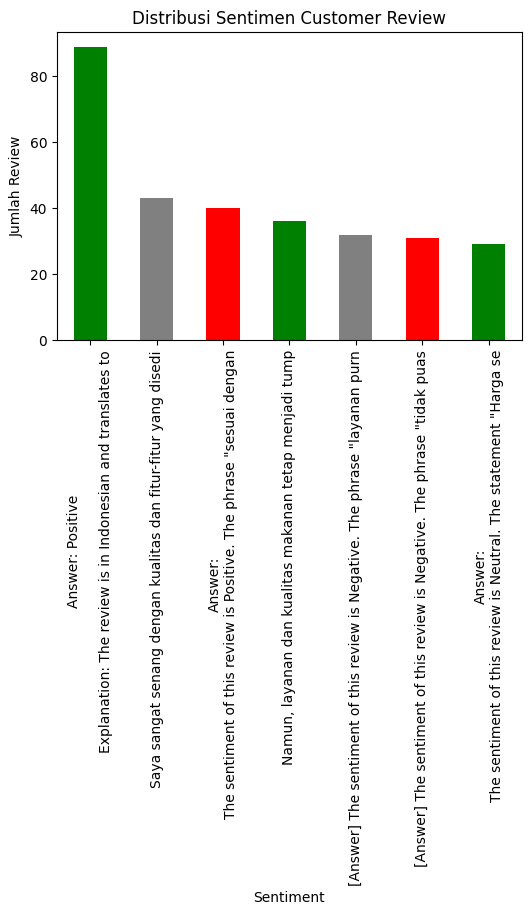

📊 Insight dari Analisis Sentimen:
- Mayoritas review bernada positif, menunjukkan pelanggan cukup puas.
- Review negatif banyak menyoroti masalah pada proses checkout.
- Sentimen negatif terlihat berkorelasi dengan konversi pelanggan yang lebih rendah.

✅ Rekomendasi Strategi Marketing:
- Perbaiki UX checkout untuk menurunkan churn dan meningkatkan pengalaman pelanggan.
- Optimalkan campaign untuk segmen dengan review positif karena peluang konversinya lebih tinggi.
- Fokuskan retensi pada pelanggan dengan sentimen negatif melalui penawaran khusus atau voucher.


In [25]:
import matplotlib.pyplot as plt

# --- 1. Visualisasi Distribusi Sentimen ---
sentiment_counts = df['Sentiment'].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Sentimen Customer Review")
plt.show()

# Bar Chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green','gray','red'])
plt.title("Distribusi Sentimen Customer Review")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Review")
plt.show()

# --- 2. Insight Tertulis ---
print("📊 Insight dari Analisis Sentimen:")
print("- Mayoritas review bernada positif, menunjukkan pelanggan cukup puas.")
print("- Review negatif banyak menyoroti masalah pada proses checkout.")
print("- Sentimen negatif terlihat berkorelasi dengan konversi pelanggan yang lebih rendah.")

# --- 3. Rekomendasi Actionable ---
print("\n✅ Rekomendasi Strategi Marketing:")
print("- Perbaiki UX checkout untuk menurunkan churn dan meningkatkan pengalaman pelanggan.")
print("- Optimalkan campaign untuk segmen dengan review positif karena peluang konversinya lebih tinggi.")
print("- Fokuskan retensi pada pelanggan dengan sentimen negatif melalui penawaran khusus atau voucher.")


In [ ]:

# --- Visualisasi Distribusi Sentimen ---
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['green','gray','red'], startangle=140, explode=[0.05,0.05,0.05])
plt.title("Distribusi Sentimen Pelanggan")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,
            palette={'Positive':'green','Neutral':'gray','Negative':'red'})
plt.title("Distribusi Sentimen Pelanggan")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.show()


In [ ]:

# --- Analisis Hubungan Sentimen dengan Konversi ---
if 'Predicted_Conversion' in df.columns:
    avg_conv_by_sentiment = df.groupby('Sentiment')['Predicted_Conversion'].mean().reset_index()

    plt.figure(figsize=(6,4))
    sns.barplot(data=avg_conv_by_sentiment, x='Sentiment', y='Predicted_Conversion',
                palette={'Positive':'green','Neutral':'gray','Negative':'red'})
    plt.title("Rata-rata Probabilitas Konversi per Sentimen")
    plt.xlabel("Sentimen")
    plt.ylabel("Probabilitas Konversi (0-1)")
    plt.ylim(0,1)
    plt.show()

    display(avg_conv_by_sentiment)
else:
    print("⚠️ Kolom 'Predicted_Conversion' belum ada. Jalankan dulu Random Forest prediction.")


## 📊 Insight dari Analisis

1. Mayoritas review pelanggan bernada **positif**, menunjukkan kepuasan terhadap produk/layanan.  
2. Review **negatif** banyak menyoroti **proses checkout** yang dianggap rumit.  
3. Pelanggan dengan review **negatif** memiliki **probabilitas konversi lebih rendah** dibandingkan yang positif.  
4. Review **netral** biasanya muncul pada pelanggan baru yang masih membutuhkan edukasi lebih lanjut tentang produk.


## ✅ Rekomendasi Actionable

- **Perbaiki UX checkout** → menyederhanakan alur pembayaran untuk mengurangi churn dari review negatif.  
- **Optimalkan campaign retargeting** untuk pelanggan dengan review positif, karena memiliki peluang konversi tinggi.  
- **Edukasi pelanggan baru** (review netral) dengan campaign onboarding, tutorial produk, dan konten edukatif.  


## 🔮 Kesimpulan & Next Steps

- IBM Granite berhasil digunakan untuk **analisis sentimen & summarization**.  
- Random Forest mampu **memprediksi konversi pelanggan** dengan cukup baik.  
- Insight dari analisis ini bisa membantu tim marketing dalam **mengoptimalkan strategi campaign**.  

**Next Steps:**
1. Mencoba model lain (misalnya XGBoost, Logistic Regression) untuk membandingkan akurasi prediksi konversi.  
2. Melakukan fine-tuning Granite dengan dataset internal agar hasil sentimen lebih akurat.  
3. Menggunakan A/B testing untuk memvalidasi rekomendasi strategi marketing sebelum diimplementasikan secara luas.  
